# El Viejo XOR: Métodos No-lineales para Problemas No-lineales

In [ ]:
explicacion

## A)

[[ 0.09762701  0.43037873]
 [ 0.20552675  0.08976637]
 [-0.1526904   0.29178823]
 ..., 
 [-0.14979966 -0.29409202]
 [-0.33397826  0.09037856]
 [-0.77174332 -0.6861918 ]]
[-1 -1  1 ...,  1 -1  1]


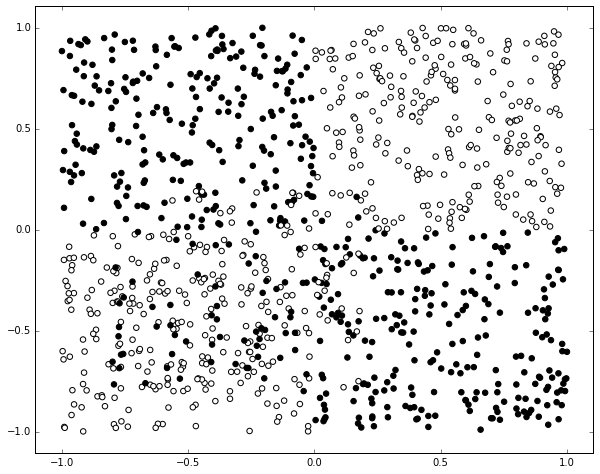

In [9]:
import numpy as np

def do_XOR(n=1000,noisy_n=100,svm=True):
    rng = np.random.RandomState(0)
    X_train = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_train = np.logical_xor(X_train[:,0] > 0, X_train[:,1] > 0)
    Y_train = 2*Y_train-1 if svm else Y_train
    X_noisy= rng.uniform(low=-0.8,high=0.2,size=(noisy_n,2))
    Y_noisy = -1*np.logical_xor(X_noisy[:,0] > 0, X_noisy[:,1] > 0) + 1
    Y_noisy = 2*Y_noisy-1 if svm else Y_noisy
    X_train = np.vstack((X_train, X_noisy))
    Y_train = np.hstack((Y_train, Y_noisy))
    X_test = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
    Y_test = 2*Y_test - 1 if svm else Y_test
    return X_train,Y_train,X_test,Y_test

X_train,Y_train,X_test,Y_test = do_XOR()
print X_train
print Y_train

f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(10,8))
axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='Greys')
plt.axis('tight')
plt.show()


## B)

In [141]:
import matplotlib.pyplot as plt

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(16, 12))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='spring')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='winter')
    XX, YY = np.mgrid[-1:1:200j, -1:1:200j]
    if model_type == 'svm':
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    elif model_type == 'tree':
        #Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z > 0 if model_type == 'svm' or model_type == 'tree' else Z > 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],levels=[-1, 0, 1])
    plt.show()

=========  ===================  ===============  ===========  ========
        C    Training accuracy    Test accuracy    Precision    Recall
=========  ===================  ===============  ===========  ========
   0.0001             0.512727            0.469     0.457831  0.48008
   0.001              0.513636            0.47      0.458753  0.481113
   0.01               0.517273            0.471     0.459677  0.482143
   0.1                0.517273            0.471     0.459677  0.482143
   1                  0.517273            0.471     0.459677  0.482143
  10                  0.517273            0.471     0.459677  0.482143
 100                  0.551818            0.517     0.505837  0.528807
1000                  0.567273            0.542     0.516367  1
=========  ===================  ===============  ===========  ========


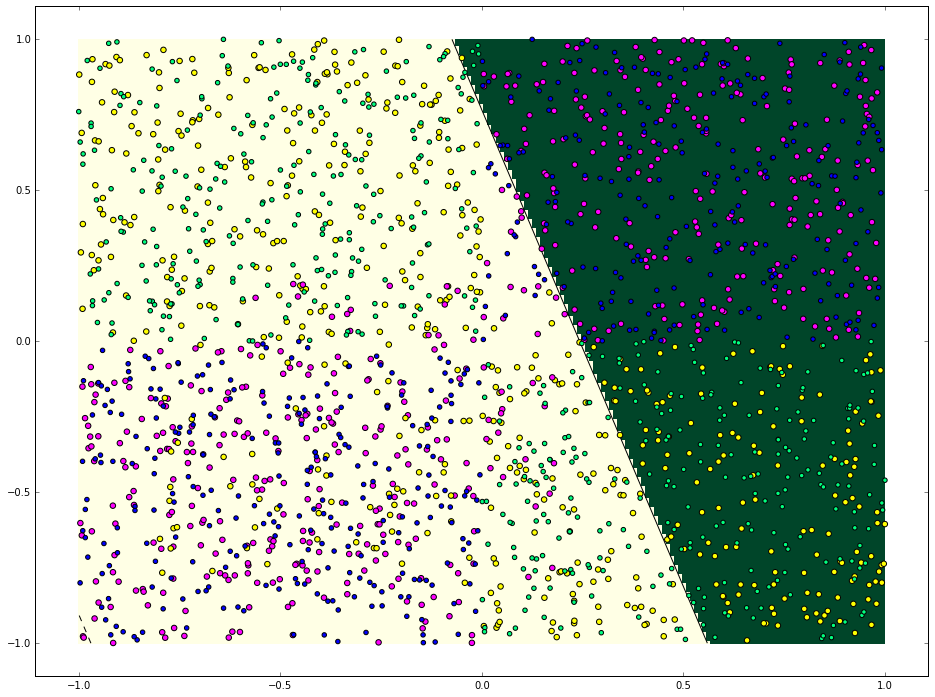

In [101]:
from sklearn.metrics import classification_report,precision_recall_fscore_support
from sklearn.svm import LinearSVC
info = []
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000]
#Cs = np.logspace(-3,2,base=10)
def do_LinearSVM(x,y,xt,yt):
    for C in Cs:
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        
        acc = model.score(x,y)
        acct = model.score(xt,yt)
        
        prec_rec = precision_recall_fscore_support(yt,model.predict(xt))[:1]
        datos = [C]+[acc,acct] + list(prec_rec[0])
        info.append(datos)
    return info

info = do_LinearSVM(X_train,Y_train,X_test,Y_test)
from tabulate import tabulate
print tabulate(info, headers=["C","Training accuracy","Test accuracy","Precision", "Recall"],  tablefmt="rst")

#graficar solo casos representativos
clf = LinearSVC(C=1000)
clf = clf.fit(X_train, Y_train)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"svm")

## C)

[0.25, 0.5, 1, 2, 4, 8, 16]
Best Test Accuracy = 0.972000


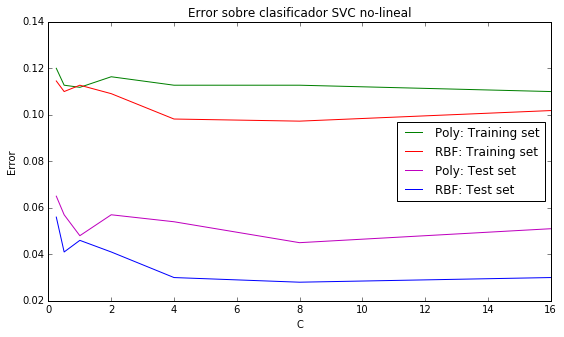

[[-2.47100889 -2.47846426 -2.4854404  ...,  3.77352275  3.78449223
   3.79469225]
 [-2.47180158 -2.47917487 -2.4860683  ...,  3.77800752  3.78892223
   3.79906735]
 [-2.47207091 -2.47936081 -2.48617037 ...,  3.78172378  3.79258171
   3.8026701 ]
 ..., 
 [ 3.54502401  3.54664305  3.54751274 ..., -4.58091952 -4.58766289
  -4.59353365]
 [ 3.55103889  3.5526289   3.55346838 ..., -4.58799468 -4.59472735
  -4.60058614]
 [ 3.55639985  3.55796095  3.55877048 ..., -4.59413589 -4.60085678
  -4.6067027 ]]


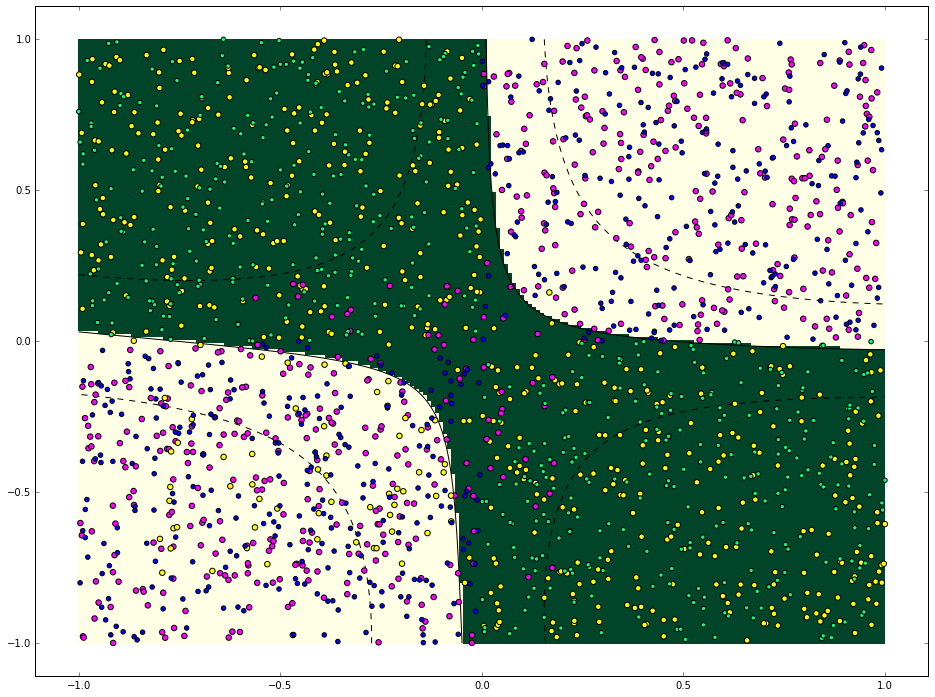

In [76]:
from sklearn.svm import SVC

Cs = [pow(2,k) for k in np.arange(-2,5,1)]
print Cs

def do_SVC(x,y,xt,yt):
    mejor = 0
    info1 = []
    info2 = []
    for C in Cs:
        clf1 = SVC(C=C, kernel="rbf")
        clf2 = SVC(C=C, kernel="poly",degree=2, coef0=1)
        
        clf1 = clf1.fit(x,y)
        clf2 = clf2.fit(x,y)
        
        acc_1 = clf1.score(x,y)
        acct_1 = clf1.score(xt,yt)
        
        acc_2 = clf2.score(x,y)
        acct_2 = clf2.score(xt,yt)
        
        if acct_1 > mejor:
            mejor = acct_1
        if acct_2 > mejor:
            mejor = acct_2
        info1.append([acc_1,acct_1])
        info2.append([acc_2,acct_2])
    print "Best Test Accuracy = %f"%mejor
    return info1,info2

info1, info2 = do_SVC(X_train,Y_train,X_test,Y_test)
error_train_1 = [ 1-i[0] for i in info1]
error_test_1 = [1-j[1] for j in info1]

error_train_2 = [ 1-i[0] for i in info2]
error_test_2 = [1-j[1] for j in info2]

import matplotlib.pyplot as plt
plt.subplots(figsize=(9,5))
plt.plot(Cs,error_train_2, label = "Poly: Training set", color = "g")
plt.plot(Cs,error_train_1, label = "RBF: Training set", color = "r")

plt.plot(Cs,error_test_2, label = "Poly: Test set", color = "m")
plt.plot(Cs,error_test_1, label = "RBF: Test set", color = "b")


#plt.xticks(Cs)
plt.xlabel('C')
plt.ylabel('Error')
plt.title('Error sobre clasificador SVC no-lineal')
#plt.axis('tight')
plt.legend(loc="center right")
plt.show()

#para casos representativos
#print "Test Accuracy = %f"%clf.score(X_test,Y_test)
clf = SVC(C=1, kernel="rbf")
clf = clf.fit(X_train,Y_train)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"svm")

## D)

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#cambiar cosas
n_h=1 #1 neurona
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], init="uniform", activation="relu"))
model.add(Dense(n_h, init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    
scores = model.evaluate(X_test, Y_test)
print "HOLA MUNDO"
print scores

test_acc = scores[1]
print "Test Accuracy = %f"%test_acc

Epoch 1/50
1100/1100 [==============================] - 0s - loss: 0.2545 - acc: 0.0155     
Epoch 2/50
1100/1100 [==============================] - 0s - loss: 0.0612 - acc: 0.0000e+00     
Epoch 3/50
1100/1100 [==============================] - 0s - loss: 0.0286 - acc: 0.0000e+00      
Epoch 4/50
1100/1100 [==============================] - 0s - loss: 0.0056 - acc: 0.0000e+00     
Epoch 5/50
1100/1100 [==============================] - 0s - loss: -0.3253 - acc: 0.0000e+00     
Epoch 6/50
1100/1100 [==============================] - 0s - loss: -1.6259 - acc: 0.0000e+00     
Epoch 7/50
1100/1100 [==============================] - 0s - loss: -2.0075 - acc: 0.0000e+00     
Epoch 8/50
1100/1100 [==============================] - 0s - loss: -2.1688 - acc: 0.0000e+00     
Epoch 9/50
1100/1100 [==============================] - 0s - loss: -2.1623 - acc: 0.0000e+00     
Epoch 10/50
1100/1100 [==============================] - 0s - loss: -2.2508 - acc: 0.0000e+00     
Epoch 11/50
1100/1100 [===

Epoch 1/50
1100/1100 [==============================] - 0s - loss: 0.2675 - acc: 0.0245     
Epoch 2/50
1100/1100 [==============================] - 0s - loss: 0.0551 - acc: 0.0000e+00     
Epoch 3/50
1100/1100 [==============================] - 0s - loss: -0.1151 - acc: 0.0000e+00     
Epoch 4/50
1100/1100 [==============================] - 0s - loss: -1.2495 - acc: 0.0000e+00     
Epoch 5/50
1100/1100 [==============================] - 0s - loss: -1.9844 - acc: 0.0000e+00     
Epoch 6/50
1100/1100 [==============================] - 0s - loss: -2.1490 - acc: 0.0000e+00     
Epoch 7/50
1100/1100 [==============================] - 0s - loss: -2.2001 - acc: 0.0000e+00     
Epoch 8/50
1100/1100 [==============================] - 0s - loss: -2.2565 - acc: 0.0000e+00     
Epoch 9/50
1100/1100 [==============================] - 0s - loss: -2.2557 - acc: 0.0000e+00     
Epoch 10/50
1100/1100 [==============================] - 0s - loss: -2.2589 - acc: 0.0000e+00     
Epoch 11/50
1100/1100 [==

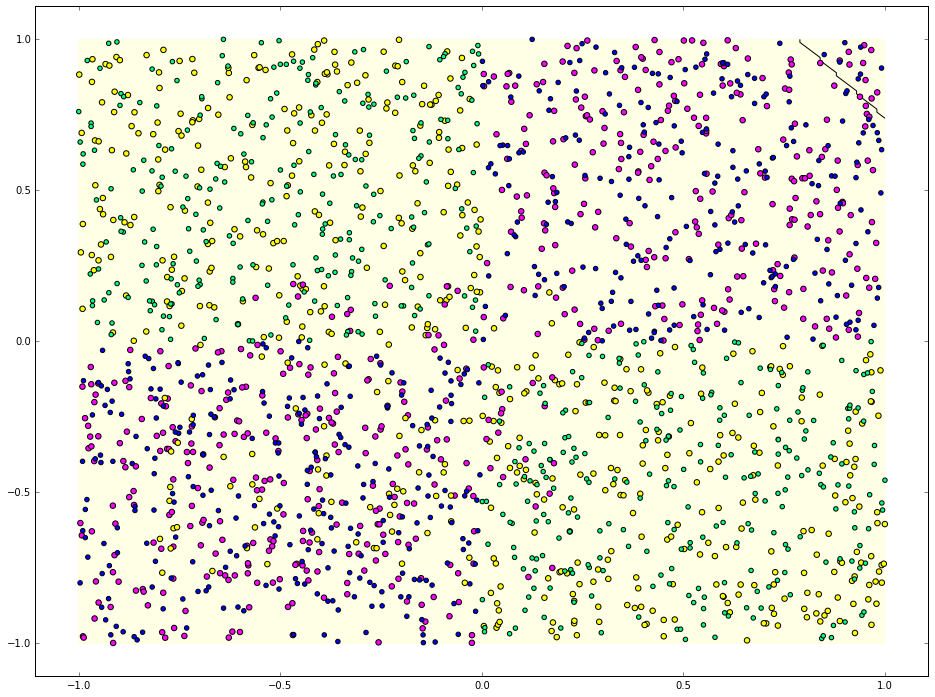

In [59]:
#para casos representativos
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], init="uniform", activation="relu"))
model.add(Dense(n_h, init="uniform", activation="sigmoid"))
model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=1)
    

plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

## E)

##### from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#alterar valores de los parametros en la red neuronal
N_hs = [pow(2,k) for k in np.arange(1,6,1)]
print N_hs
def do_ANN(x,y,xt,yt):
    mejor = 0
    info_train = []
    info_test = []
    for n in N_hs:
        model = Sequential()
        model.add(Dense(n, input_dim=x.shape[1], init="uniform", activation="relu"))
        model.add(Dense(1, init="uniform", activation="sigmoid"))
        model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
        model.fit(x, y, nb_epoch=50, batch_size=100, verbose=0)
        
        scores = model.evaluate(x, y)
        info_train.append(scores[1])
        scores = model.evaluate(xt, yt)
        info_test.append(scores[1])
         if scores[1] > mejor:
            mejor = scores[1]
    print "Test Accuracy = %f"%mejor
    return info_train,info_test

info_tr,info_ts = do_ANN(X_train,Y_train,X_test,Y_test)

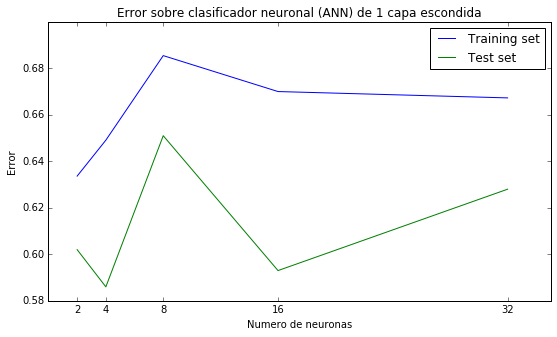

[[  0.00000000e+00   0.00000000e+00   5.29180747e-39 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  4.87154685e-39   6.67448268e-39   9.14453887e-39 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  8.41843225e-39   1.15340568e-38   1.58025171e-38 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 ..., 
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


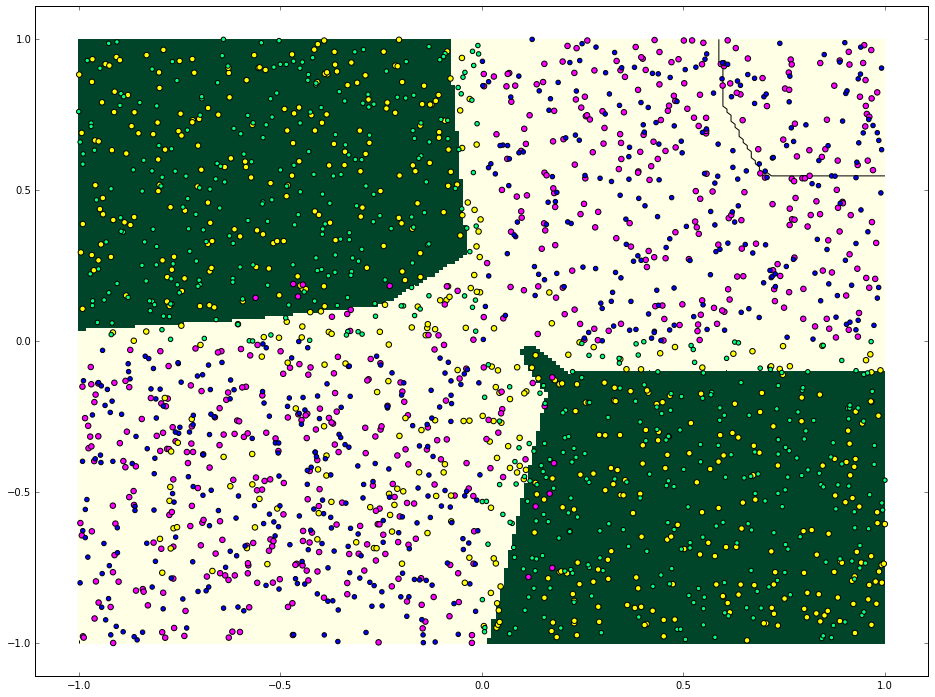

In [81]:
error_train = [1-i for i in info_tr]
error_test = [1-j for j in info_ts]

import matplotlib.pyplot as plt
plt.subplots(figsize=(9,5))
plt.plot(N_hs,error_train, label = "Training set")
plt.plot(N_hs,error_test, label = "Test set")

plt.xticks(N_hs)
plt.xlabel('Numero de neuronas')
plt.ylabel('Error')
plt.title('Error sobre clasificador neuronal (ANN) de 1 capa escondida')
#plt.axis('tight')
plt.legend(loc="upper right")
plt.show()

#para casos representativos
#model = Sequential()
#model.add(Dense(16, input_dim=X_train.shape[1], init="uniform", activation="relu"))
#model.add(Dense(1, init="uniform", activation="sigmoid"))
#model.compile(optimizer=SGD(lr=1), loss="binary_crossentropy", metrics=["accuracy"])
#model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    
#plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

## F)

==============  ==========
Config            Accuracy
==============  ==========
Gini-best            0.489
Entropy-best         0.486
Gini-random          0.491
Entropy-random       0.491
==============  ==========


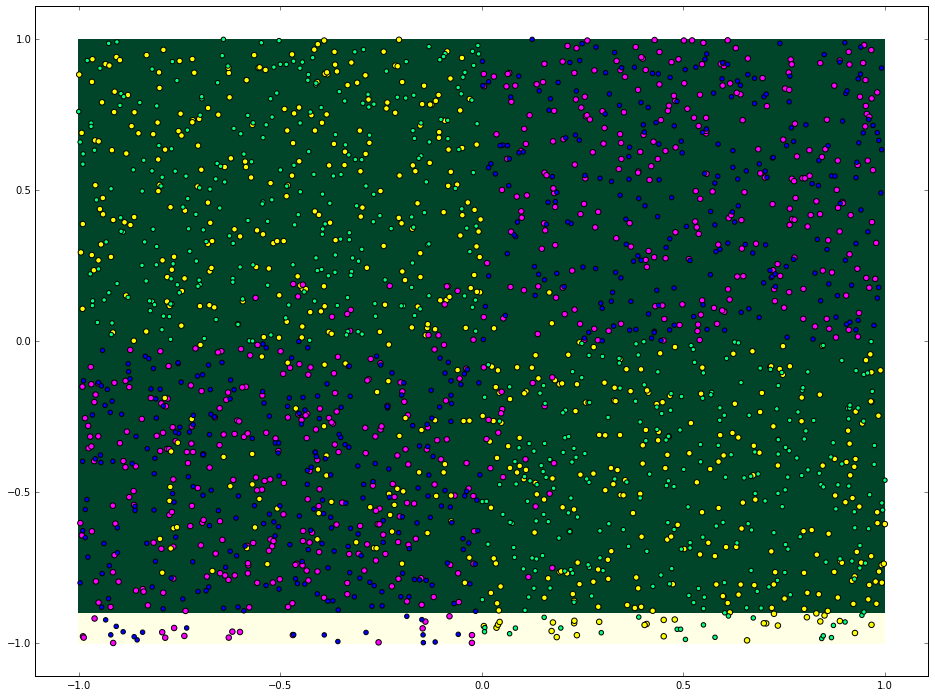

In [110]:
from sklearn.tree import DecisionTreeClassifier as Tree

acc = []
clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
acc.append(acc_test)

clf=Tree(criterion="entropy",splitter="best",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
acc.append(acc_test)

clf=Tree(criterion="gini",splitter="random",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
acc.append(acc_test)

clf=Tree(criterion="entropy",splitter="random",random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
acc.append(acc_test)

names = ["Gini-best", "Entropy-best", "Gini-random", "Entropy-random"]
table = zip(*[names,acc])
from tabulate import tabulate
print tabulate(table, headers=["Config","Accuracy"],  tablefmt="rst")


#print clf.tree_.max_depth

#para casos representativos
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"tree")

## G)

Best Test Accuracy = 0.990000


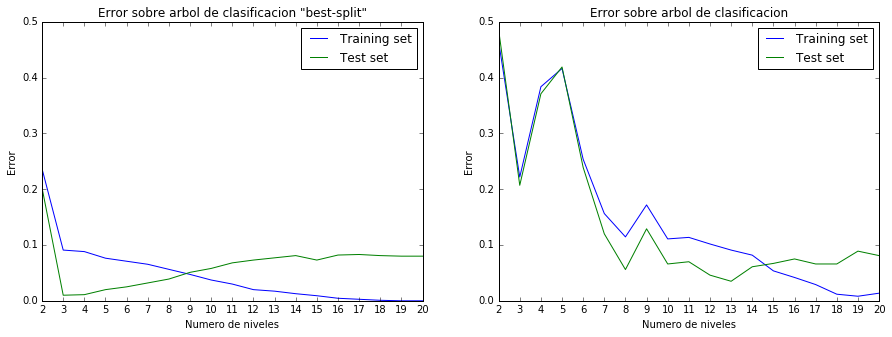

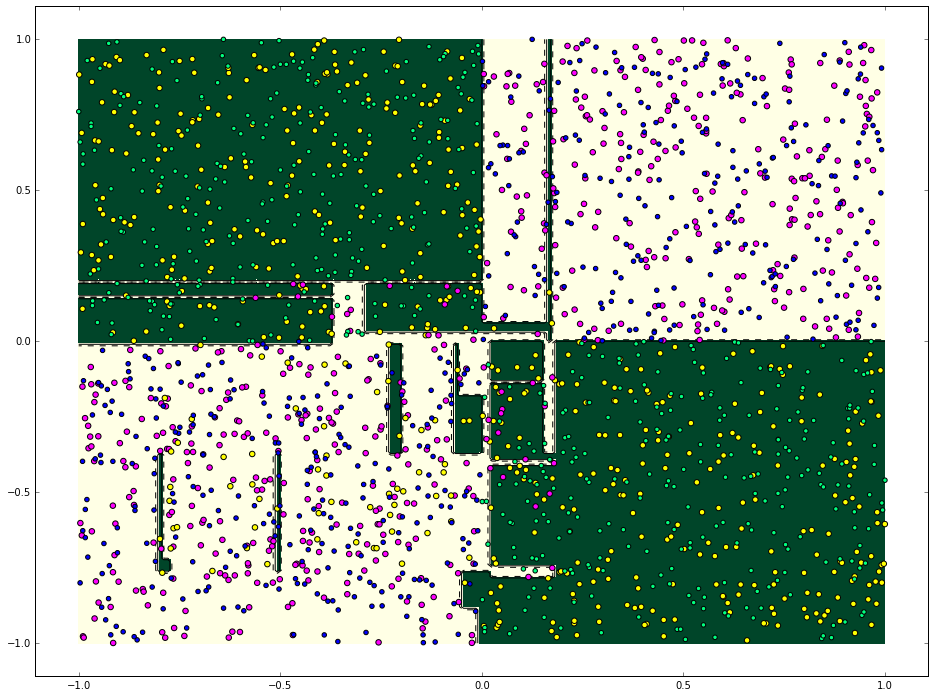

In [144]:
# Hacer algo

N_ts = np.arange(2,21,1)
def do_Tree(x,y,xt,yt):
    mejor = 0
    info_1 = []
    info_2 = []
    for n_t in N_ts:
        clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=n_t)
        clf.fit(x,y)
        acc = clf.score(x,y)
        acc_t = clf.score(xt,yt)
        if acc_t > mejor:
            mejor = acc_t
        info_1.append([acc,acc_t])
        
        clf=Tree(criterion="gini",splitter="random",random_state=0,max_depth=n_t)
        clf.fit(x,y)
        acc = clf.score(x,y)
        acc_t = clf.score(xt,yt)
        if acc_t > mejor:
            mejor = acc_t
        info_2.append([acc,acc_t])
    print "Best Test Accuracy = %f"%mejor
    return info_1,info_2

info1,info2 = do_Tree(X_train,Y_train,X_test,Y_test)
error_train = [ 1-i[0] for i in info1]
error_test = [1-j[1] for j in info1]
error_train2 = [ 1-i[0] for i in info2]
error_test2 = [1-j[1] for j in info2]

import matplotlib.pyplot as plt
f, axarr = plt.subplots(1, 2, figsize=(15,5))
axarr[0].plot(N_ts,error_train, label = "Training set")
axarr[0].plot(N_ts,error_test, label = "Test set")
axarr[0].set_xticks(N_ts)
axarr[0].set_xlabel('Numero de niveles')
axarr[0].set_ylabel('Error')
axarr[0].set_title('Error sobre arbol de clasificacion "best-split"')
axarr[0].set_ylim(0,0.5)
axarr[0].legend(loc="upper right")

axarr[1].plot(N_ts,error_train2, label = "Training set")
axarr[1].plot(N_ts,error_test2, label = "Test set")
axarr[1].set_xticks(N_ts)
axarr[1].set_xlabel('Numero de niveles')
axarr[1].set_ylabel('Error')
axarr[1].set_title('Error sobre arbol de clasificacion')
axarr[1].legend(loc="upper right")
plt.show()

#para casos representativos
clf=Tree(criterion="gini",splitter="best",random_state=0,max_depth=4)
clf.fit(X_train,Y_train)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,"tree")